In [1]:
# Own Libraries
from utils.data import load_data
from utils.metrics import prec_recall, iou_score, f1_dice
from utils.similarity import Similarity
from utils.image_processing import image_to_windows, get_3d_norm_histogram, calculate_histograms
# 3rd Party Libraries
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
# Load Data
db, db_files = load_data("./data/BBDD/",".jpg", desc = "Loading BBDD Data...")
qsd2_w1, qsd2_w1_files = load_data("./data/qsd2_w1/",".jpg", desc = "Loading qsd2_w1 Data...")

# 3D Normalized Histograms Multiresolutio/Block Images
db_feature_matrix = calculate_histograms(db,16,n_rows=4,n_cols=4,desc="Normalized 3D Histograms Calculation for BBDD...")
qsd2_w1_feature_matrix = calculate_histograms(qsd2_w1,16,n_rows=4,n_cols=4,desc = "Normalized 3D Histograms Calculation for qsd2_w1...")
print(db_feature_matrix.shape)
print(qsd2_w1_feature_matrix.shape)
# Num Images, Num Blocks per Image, N_BINS x N_BINS x N_BINS 3D Histogram
# TODO: concatenate histograms FROM BLOCKS. (287, 16, 16, 16, 16) to (287, 1, 16, 16, 16)

Loading qsd2_w1 Data...: 100%|██████████| 30/30 [00:00<00:00, 155.06it/s]

./data/BBDD/ read: 287 images



Normalized 3D Histograms Calculation for BBDD...:   4%|▍         | 11/287 [00:00<00:02, 106.92it/s]

./data/qsd2_w1/ read: 30 images


Normalized 3D Histograms Calculation for BBDD...: 100%|██████████| 287/287 [00:02<00:00, 104.30it/s]
Normalized 3D Histograms Calculation for qsd2_w1...: 100%|██████████| 30/30 [00:00<00:00, 184.01it/s]

(287, 16, 16, 16, 16)
(30, 16, 16, 16, 16)


<Figure size 1080x1080 with 0 Axes>

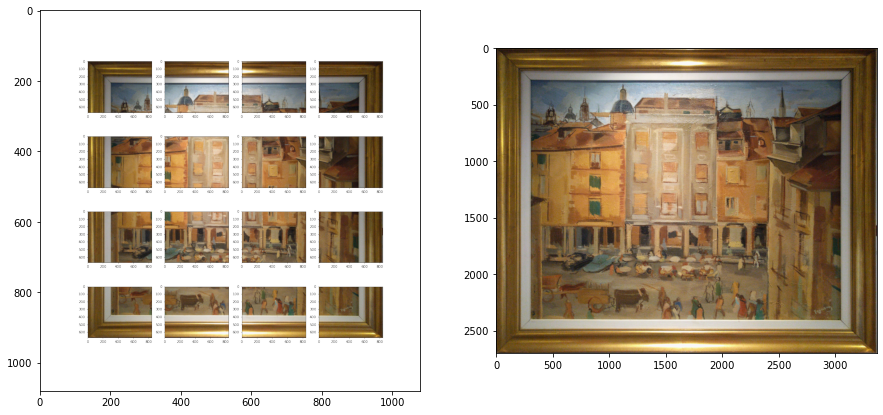

<Figure size 1080x1080 with 0 Axes>

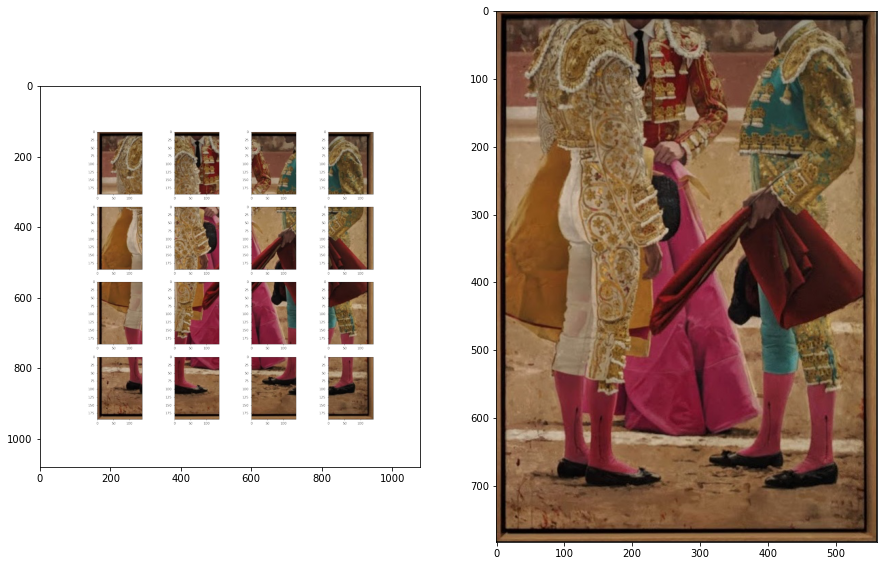

In [5]:
def plot_image_and_windows(images: np.ndarray, n_cols: int, n_rows: int) -> None:
    for im in images:
        windows = image_to_windows(im, n_cols=n_cols, n_rows=n_rows)
        f, axarr = plt.subplots(4,4, figsize=(15,15))
        for i in range(n_rows):
            for j in range(n_cols):
                axarr[i,j].imshow(windows[j+i*n_rows])
                
        plt.savefig('tmp.png')
        plt.clf() 
        f, axarr = plt.subplots(1,2, figsize=(15,15))
        windows = imread('tmp.png')
        axarr[0].imshow(windows)
        axarr[1].imshow(im)
        plt.show()
        os.remove('tmp.png')
        
        
plot_image_and_windows(db[:2], 4, 4)